#CIFAR 10

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


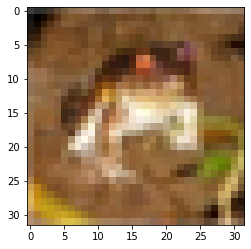

In [4]:
import matplotlib.pyplot as plt
digit = X_train[0]
plt.imshow(digit)
plt.show()

In [5]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


In [6]:
X_train = X_train.reshape((50000,32*32*3))
X_test = X_test.reshape((10000,32*32*3))


X_train.shape , X_test.shape

((50000, 3072), (10000, 3072))

In [7]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(1024, activation = 'relu'))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(256, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

In [11]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [12]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 6s 9ms/step - loss: 2.3426 - accuracy: 0.1979 - val_loss: 1.9368 - val_accuracy: 0.2898
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 1.9169 - accuracy: 0.3080 - val_loss: 2.1695 - val_accuracy: 0.2222
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8084 - accuracy: 0.3501 - val_loss: 1.8333 - val_accuracy: 0.3275
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7410 - accuracy: 0.3774 - val_loss: 1.7881 - val_accuracy: 0.3516
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6830 - accuracy: 0.3982 - val_loss: 1.7696 - val_accuracy: 0.3822
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6317 - accuracy: 0.4159 - val_loss: 1.6557 - val_accuracy: 0.4156
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5963 - accuracy: 0.4285 - val_loss: 1.5976 - val_accuracy: 0.4342

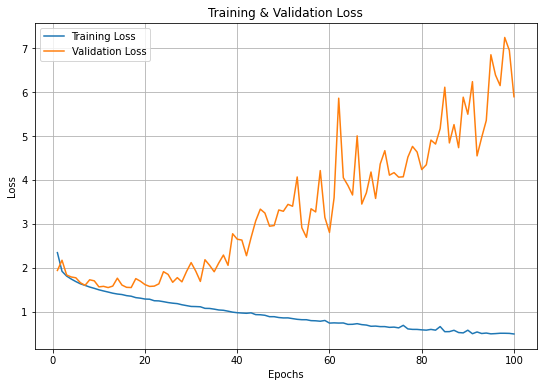

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [14]:
import numpy as np

loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 4.4008 - accuracy: 0.5047
Loss = 4.40084
Accuracy = 0.50470


In [15]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1,:]))

[[0.          0.000000012 0.000000006 0.9989202   0.00102023  0.000000861 0.          0.          0.000000422 0.000058336]]


In [16]:
print(CIFAR.predict_classes(X_test[:1,:]))

[3]
